# 毕业论文`GRAD`
## 污染物观测值

---
*@author: Evan*\
*@date: 2023-11-09*

In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'PM2.5'
lows = [2014, 2015, 2016,]
highs = [2019, 2021, 2022]

mean_low = []
mean_high = []
for year in lows:
    df = pd.read_excel(obsSep + f'site_{var}_{year}.xlsx',index_col=0)
    mean = df.mean(axis=1,skipna=True).values
    mean_low.append(mean)
avg_low = np.nanmean(mean_low,axis=0)

for year in highs:
    df = pd.read_excel(obsSep + f'site_{var}_{year}.xlsx',index_col=0)
    mean = df.mean(axis=1,skipna=True).values
    mean_high.append(mean)
avg_high = np.nanmean(mean_high,axis=0)

In [3]:
df = pd.DataFrame(
    index=pd.date_range(start='2014-09-01',end='2014-09-30T23',freq='H'),
    data = {'Low': avg_low, 'High': avg_high}
)

df_day = df.resample('D').mean()
df_80per = df.resample('D').quantile(0.8)
df_20per = df.resample('D').quantile(0.2)

df_daily = df.groupby(df.index.hour).mean()

## 绘图

O3要计算MDA8，不适用于绘制20和80百分位值

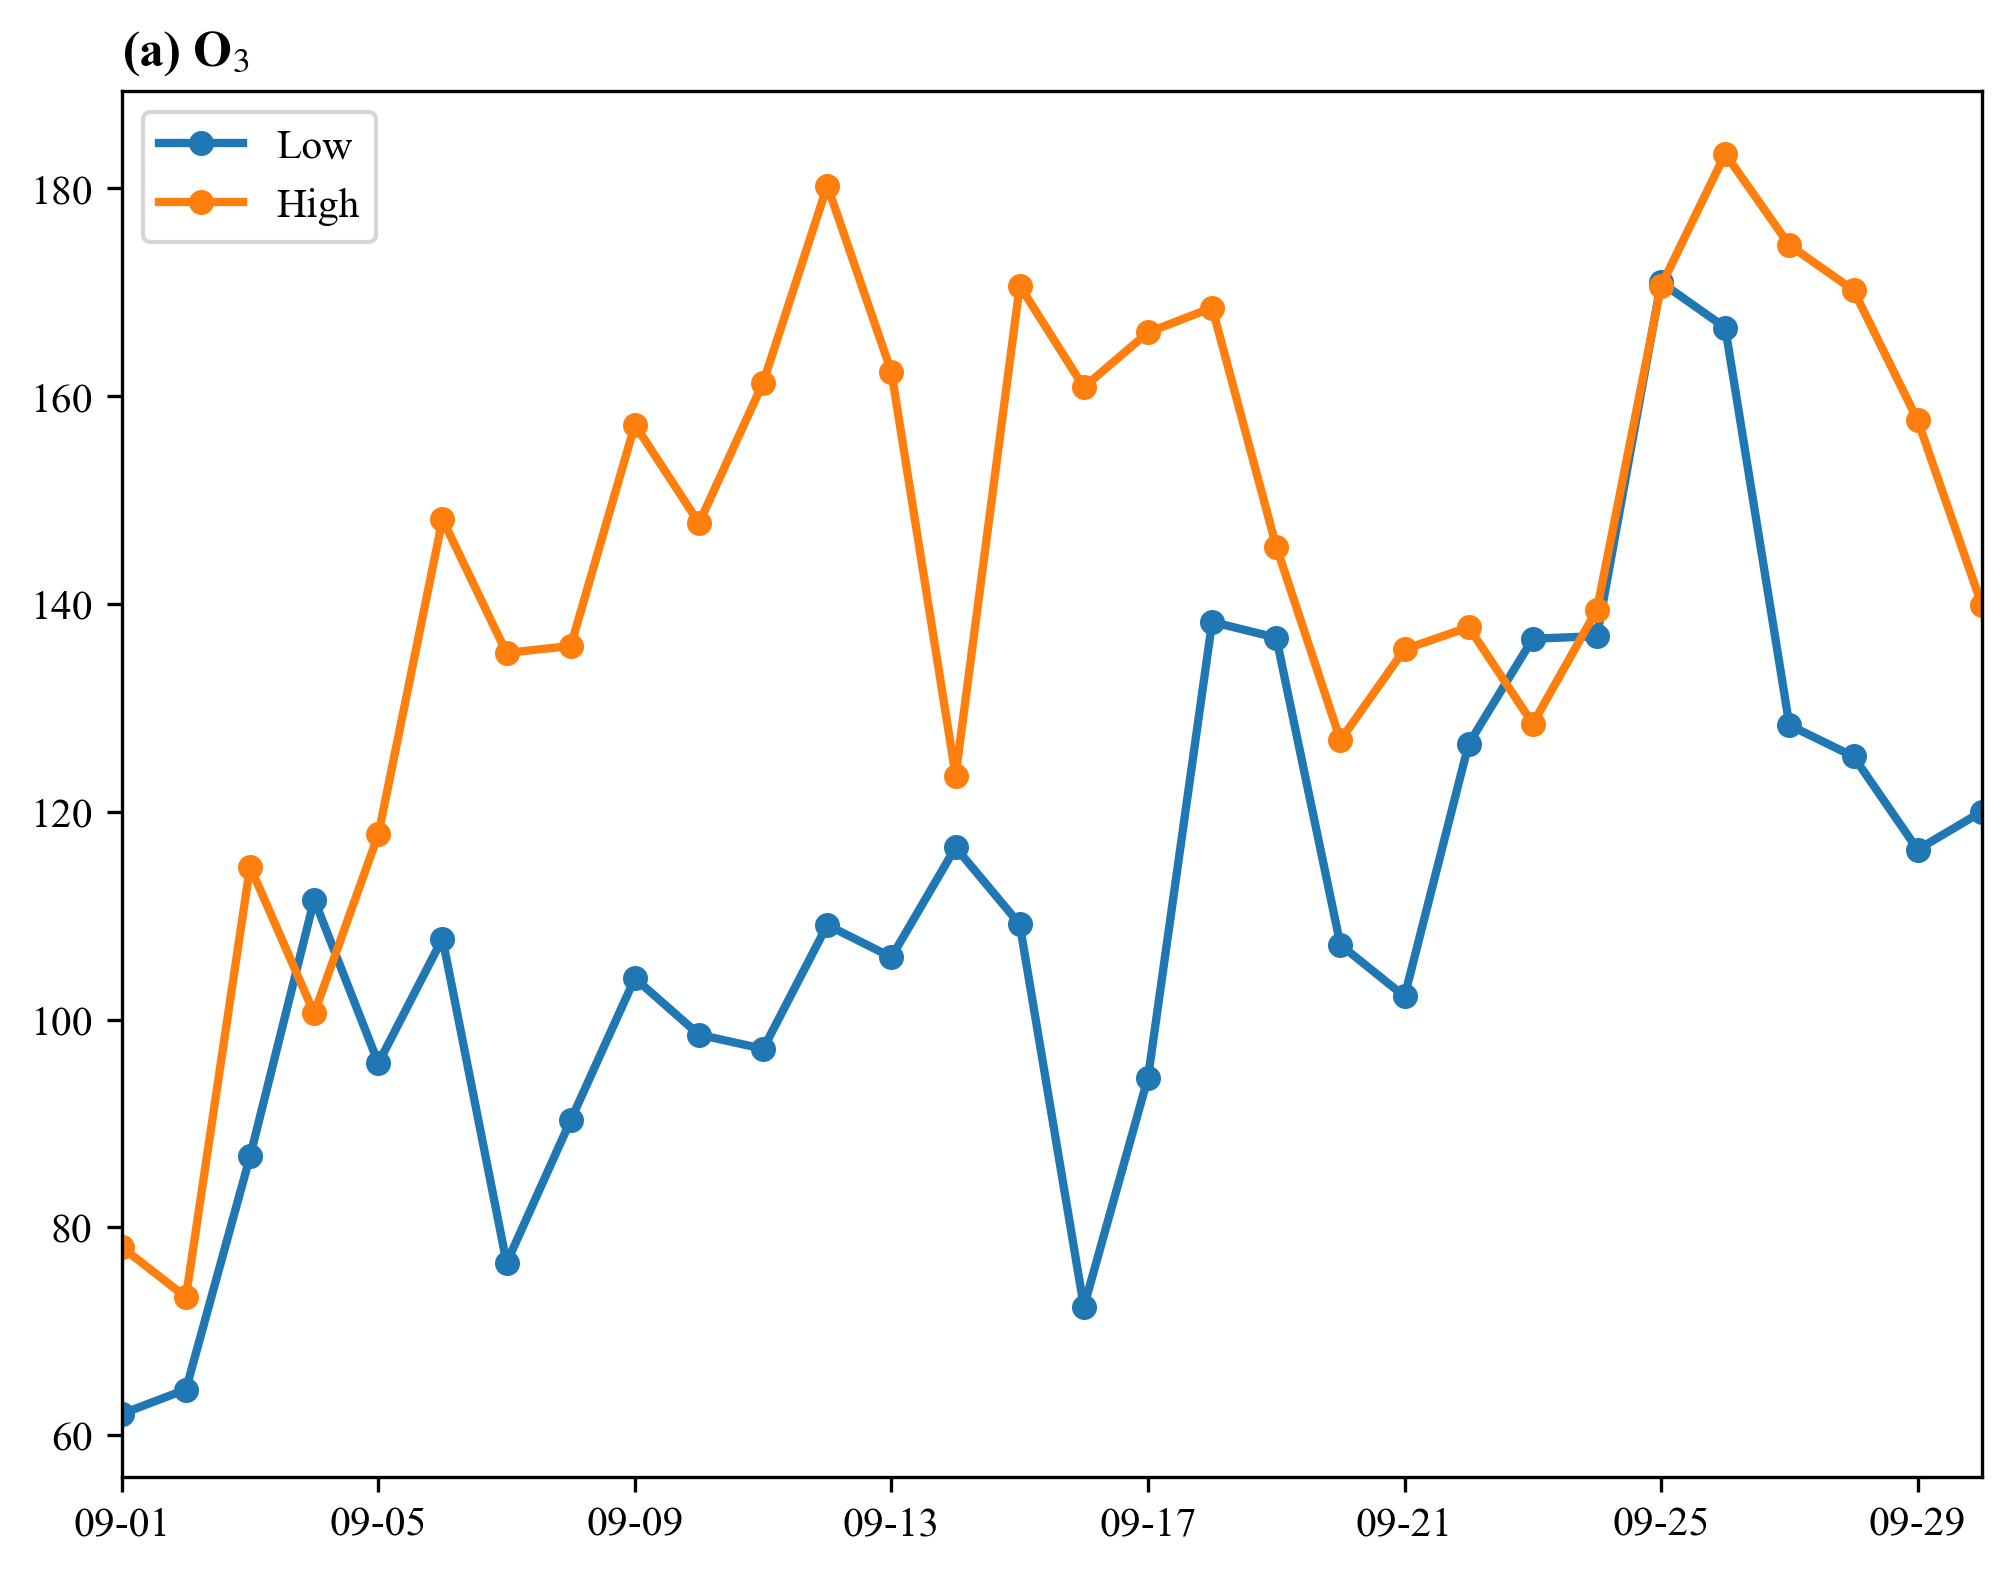

In [29]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

xx = np.arange(0,len(df_day.index),1)
# lower years
ax.plot(xx,df_day['Low'],color='tab:blue',linewidth=2,label='Low',marker='.',markersize=10)
# ax.fill_between(xx,df_80per['Low'],df_20per['Low'],color='tab:blue',alpha=0.1)
# higher years
ax.plot(xx,df_day['High'],color='tab:orange',linewidth=2,label='High',marker='.',markersize=10)
# ax.fill_between(xx,df_80per['High'],df_20per['High'],color='tab:orange',alpha=0.1)

# ticks and labels
ax.set_xlim([0,len(df_day.index)-1])
# ax.set_ylim(24,37)
ax.set_xticks(xx[::4])
ax.set_xticklabels(pd.date_range('2023-09-01','2023-09-30',freq='4D').strftime('%m-%d'))#,rotation=45)
ax.legend(loc=2)
ax.set_title('(a) O$_3$',loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
plt.show()

O3日变化

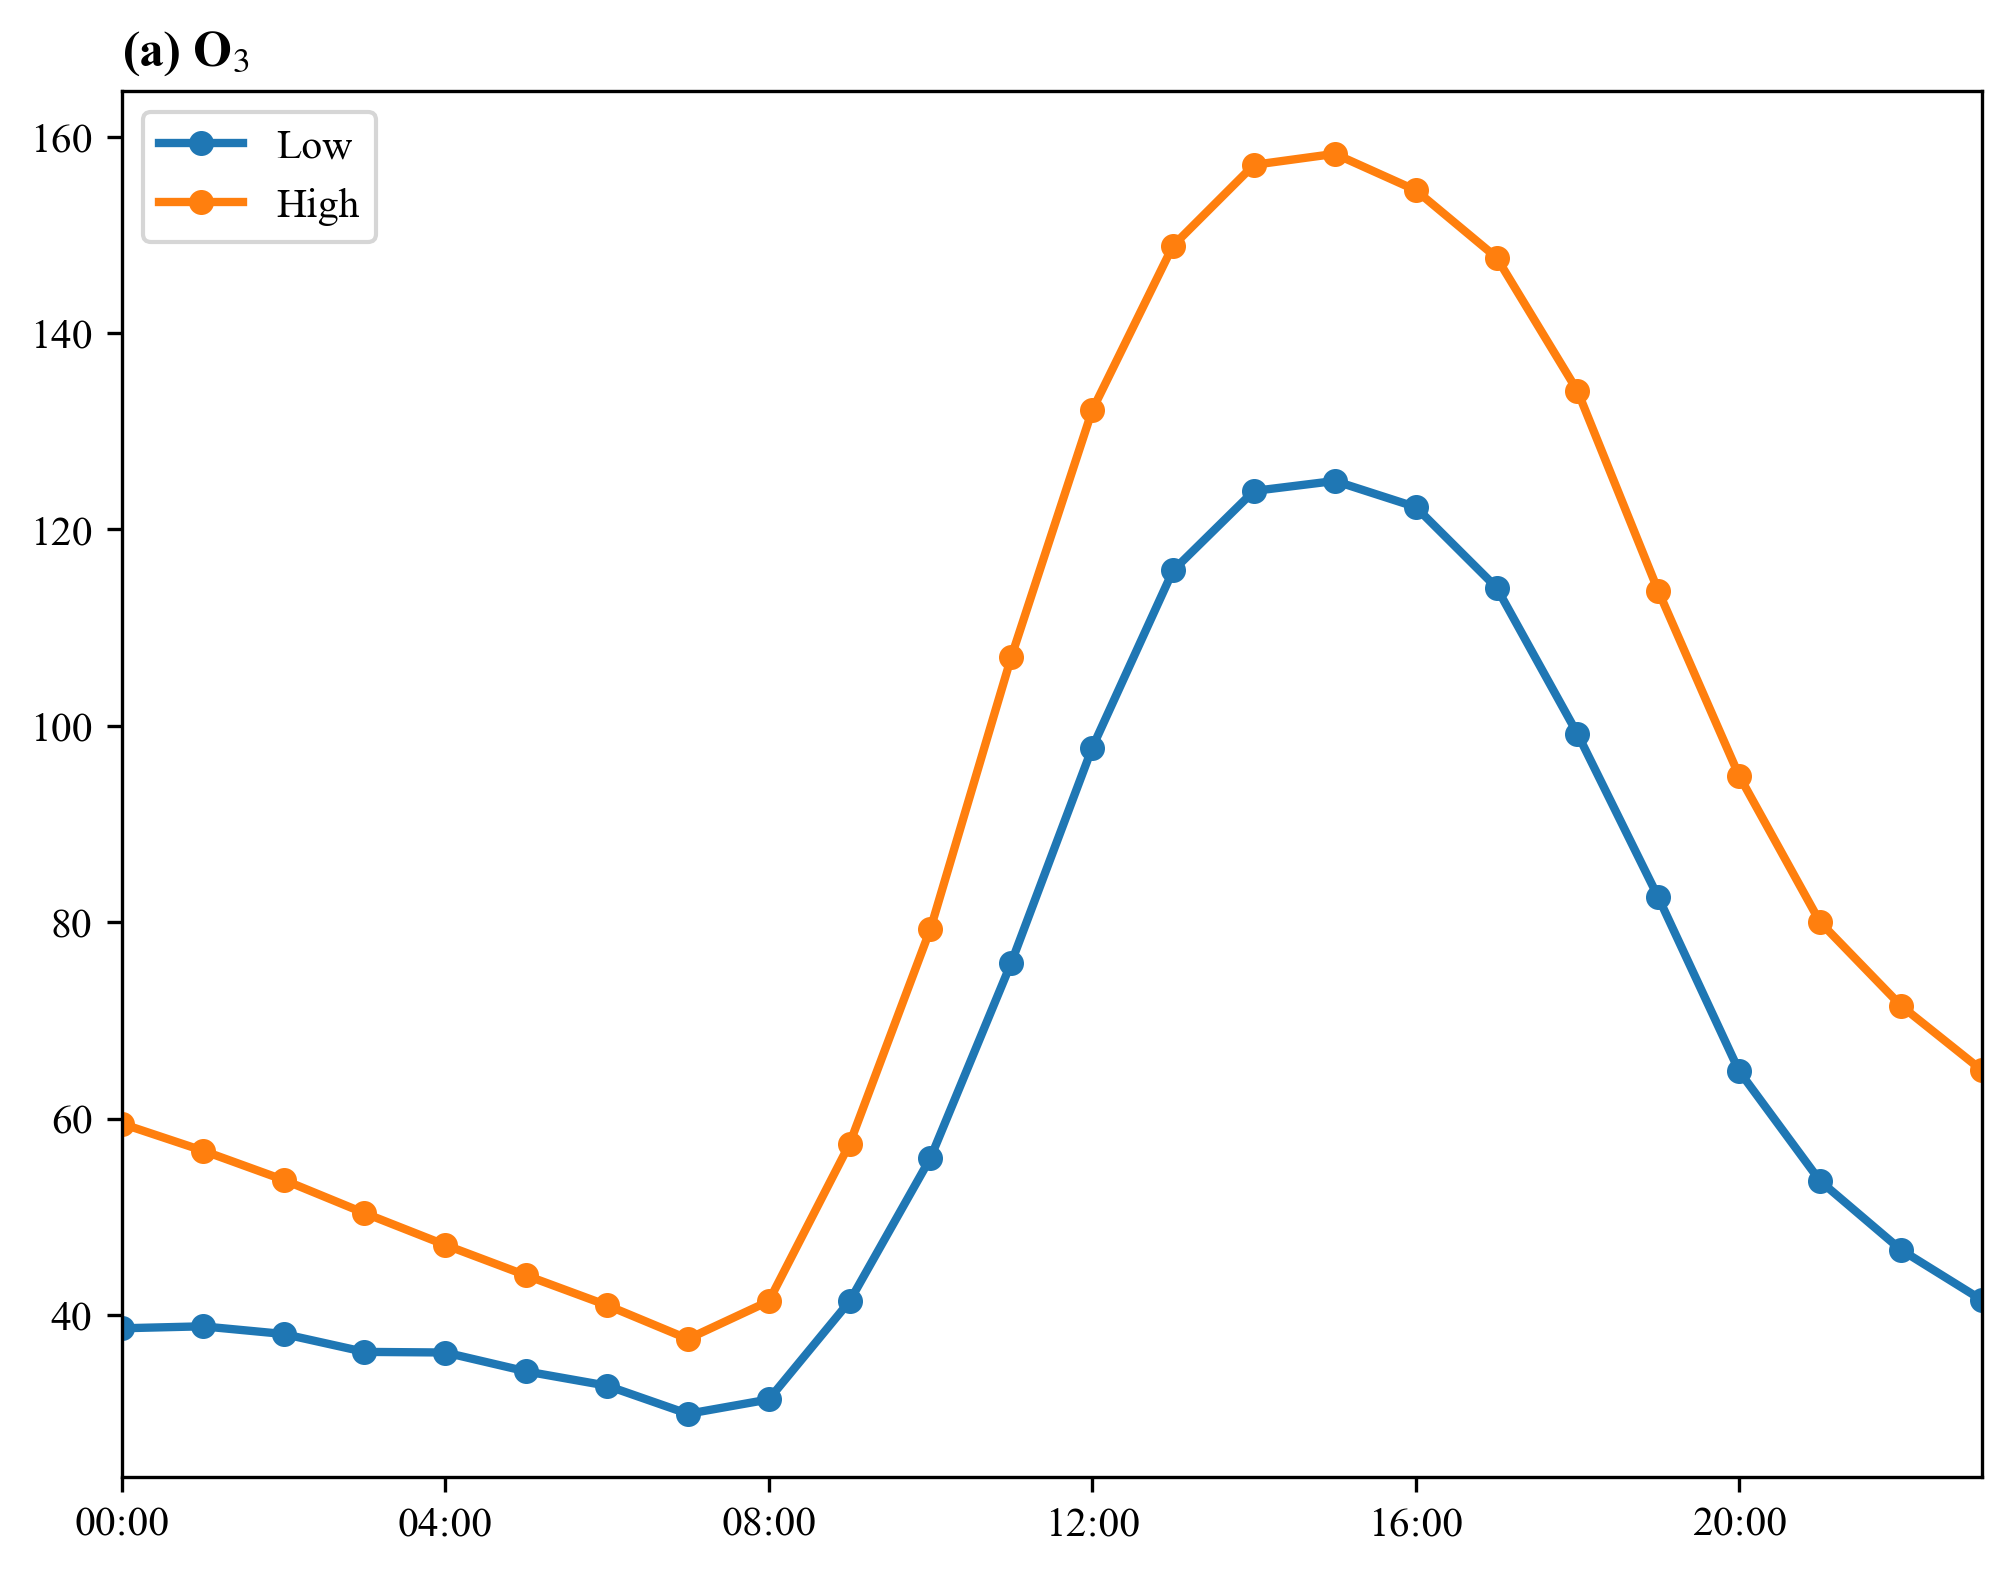

In [33]:
fig = plt.figure(figsize=(8,6),dpi=300)
ax = fig.subplots(1,1)

xx = np.arange(0,len(df_daily.index),1)
# lower years
ax.plot(xx,df_daily['Low'],color='tab:blue',linewidth=2,label='Low',marker='.',markersize=10)
# higher years
ax.plot(xx,df_daily['High'],color='tab:orange',linewidth=2,label='High',marker='.',markersize=10)

# ticks and labels
ax.set_xlim([0,len(df_daily.index)-1])
# ax.set_ylim(24,37)
ax.set_xticks(xx[::4])
ax.set_xticklabels(pd.date_range('2023-09-01T00','2023-09-01T23',freq='4H').strftime('%H:%M'))#,rotation=45)
ax.legend(loc=2)
ax.set_title('(a) O$_3$',loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
plt.show()

合成月变化与日变化

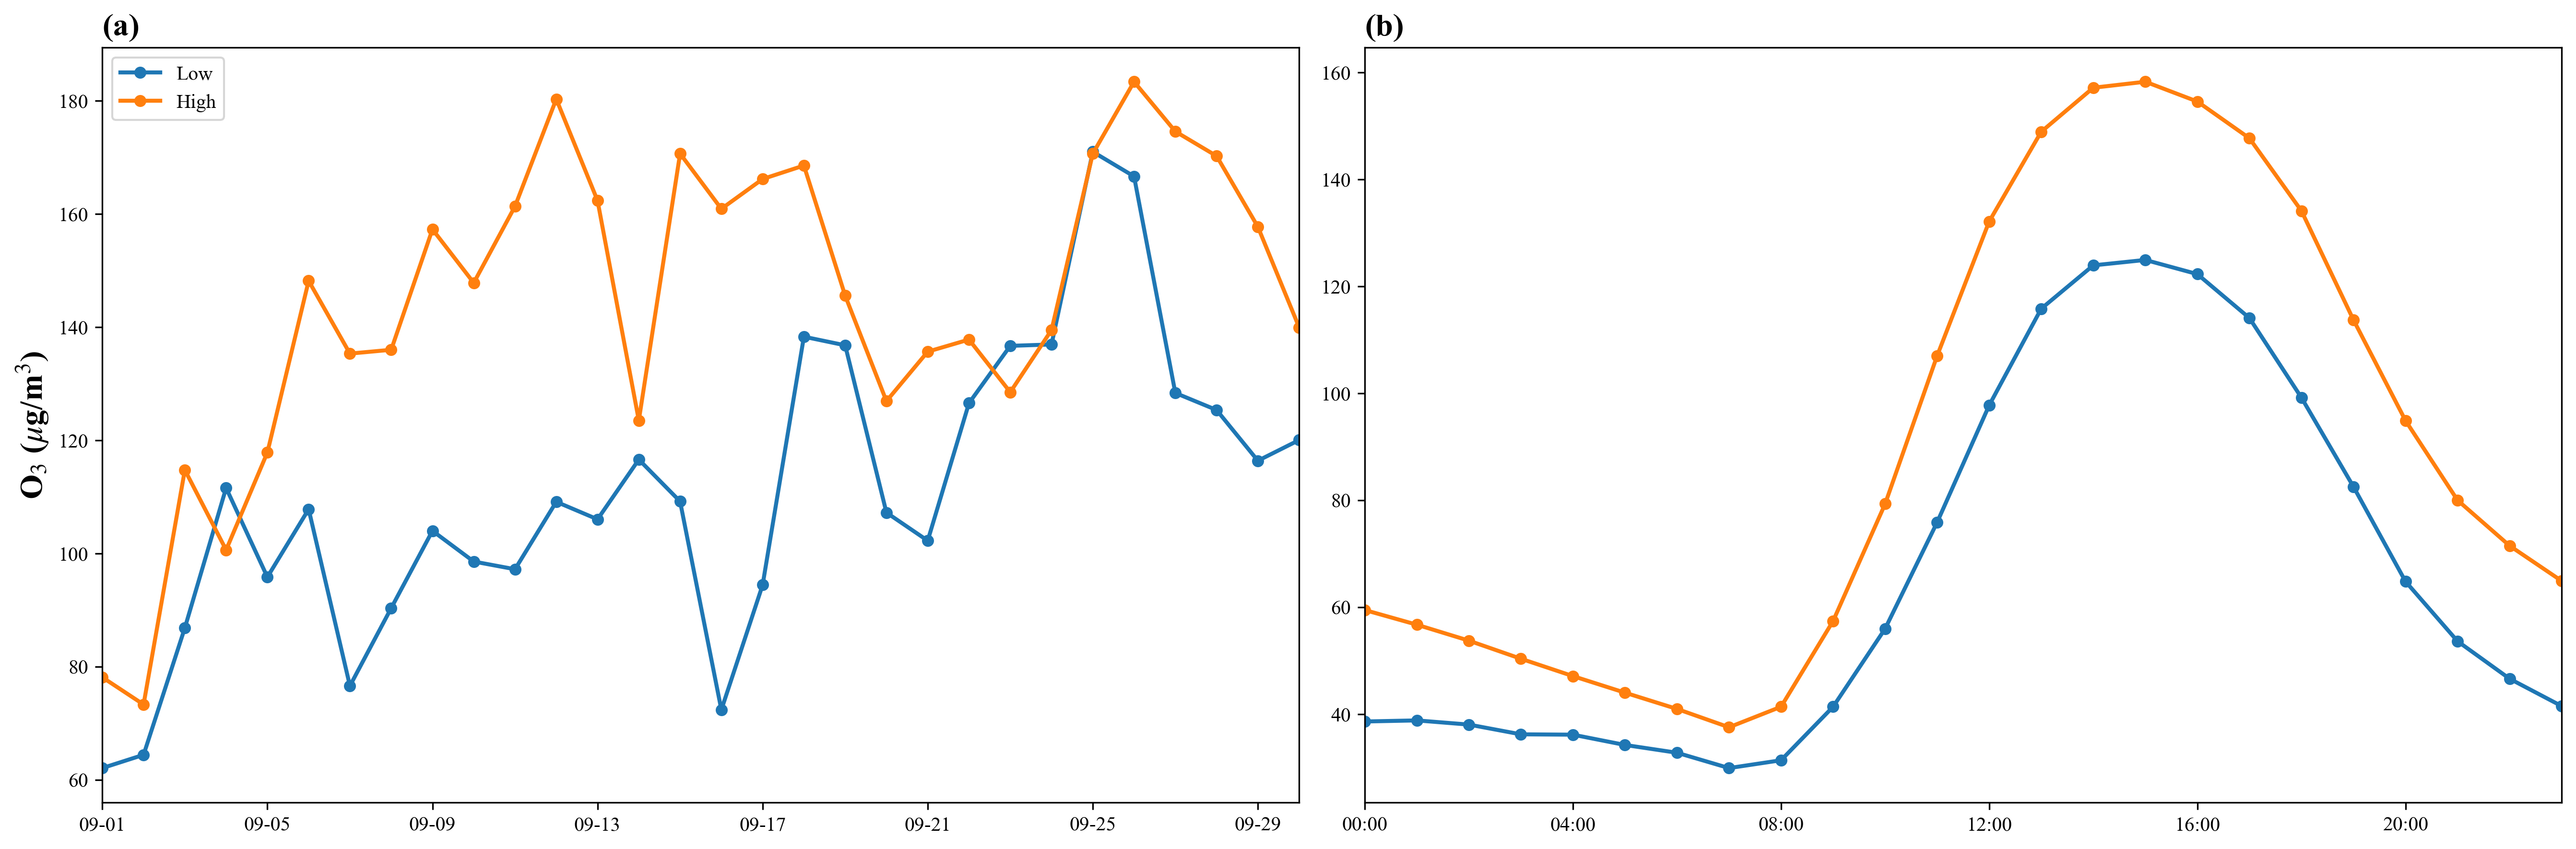

In [51]:
fig = plt.figure(figsize=(18,6),dpi=300)
ax = fig.subplots(1,2)

xx1 = np.arange(0,len(df_day.index),1)
# lower years
ax[0].plot(xx1,df_day['Low'],color='tab:blue',linewidth=2,label='Low',marker='.',markersize=10)
# ax[0].fill_between(xx1,df_80per['Low'],df_20per['Low'],color='tab:blue',alpha=0.1)
# higher years
ax[0].plot(xx1,df_day['High'],color='tab:orange',linewidth=2,label='High',marker='.',markersize=10)
# ax[0].fill_between(xx1,df_80per['High'],df_20per['High'],color='tab:orange',alpha=0.1)

# ticks and labels
ax[0].set_xlim([0,len(df_day.index)-1])
# ax[0].set_ylim(20,190)
ax[0].set_xticks(xx1[::4])
ax[0].set_xticklabels(pd.date_range('2023-09-01','2023-09-30',freq='4D').strftime('%m-%d'))#,rotation=45)
ax[0].legend(loc=2)
ax[0].set_title('(a)',loc='left',fontdict={'fontsize':16,'fontweight':'bold'})
ax[0].set_ylabel('O$_3$ ($\mu$g/m$^3$)',fontdict={'fontsize':16,'fontweight':'bold'})

xx2 = np.arange(0,len(df_daily.index),1)
# lower years
ax[1].plot(xx2,df_daily['Low'],color='tab:blue',linewidth=2,label='Low',marker='.',markersize=10)
# higher years
ax[1].plot(xx2,df_daily['High'],color='tab:orange',linewidth=2,label='High',marker='.',markersize=10)

# ticks and labels
ax[1].set_xlim([0,len(df_daily.index)-1])
# ax[1].set_ylim(20,190)
ax[1].set_xticks(xx2[::4])
ax[1].set_xticklabels(pd.date_range('2023-09-01T00','2023-09-01T23',freq='4H').strftime('%H:%M'))#,rotation=45)
ax[1].set_title('(b)',loc='left',fontdict={'fontsize':16,'fontweight':'bold'})

plt.tight_layout()
plt.show()

## 换个风格

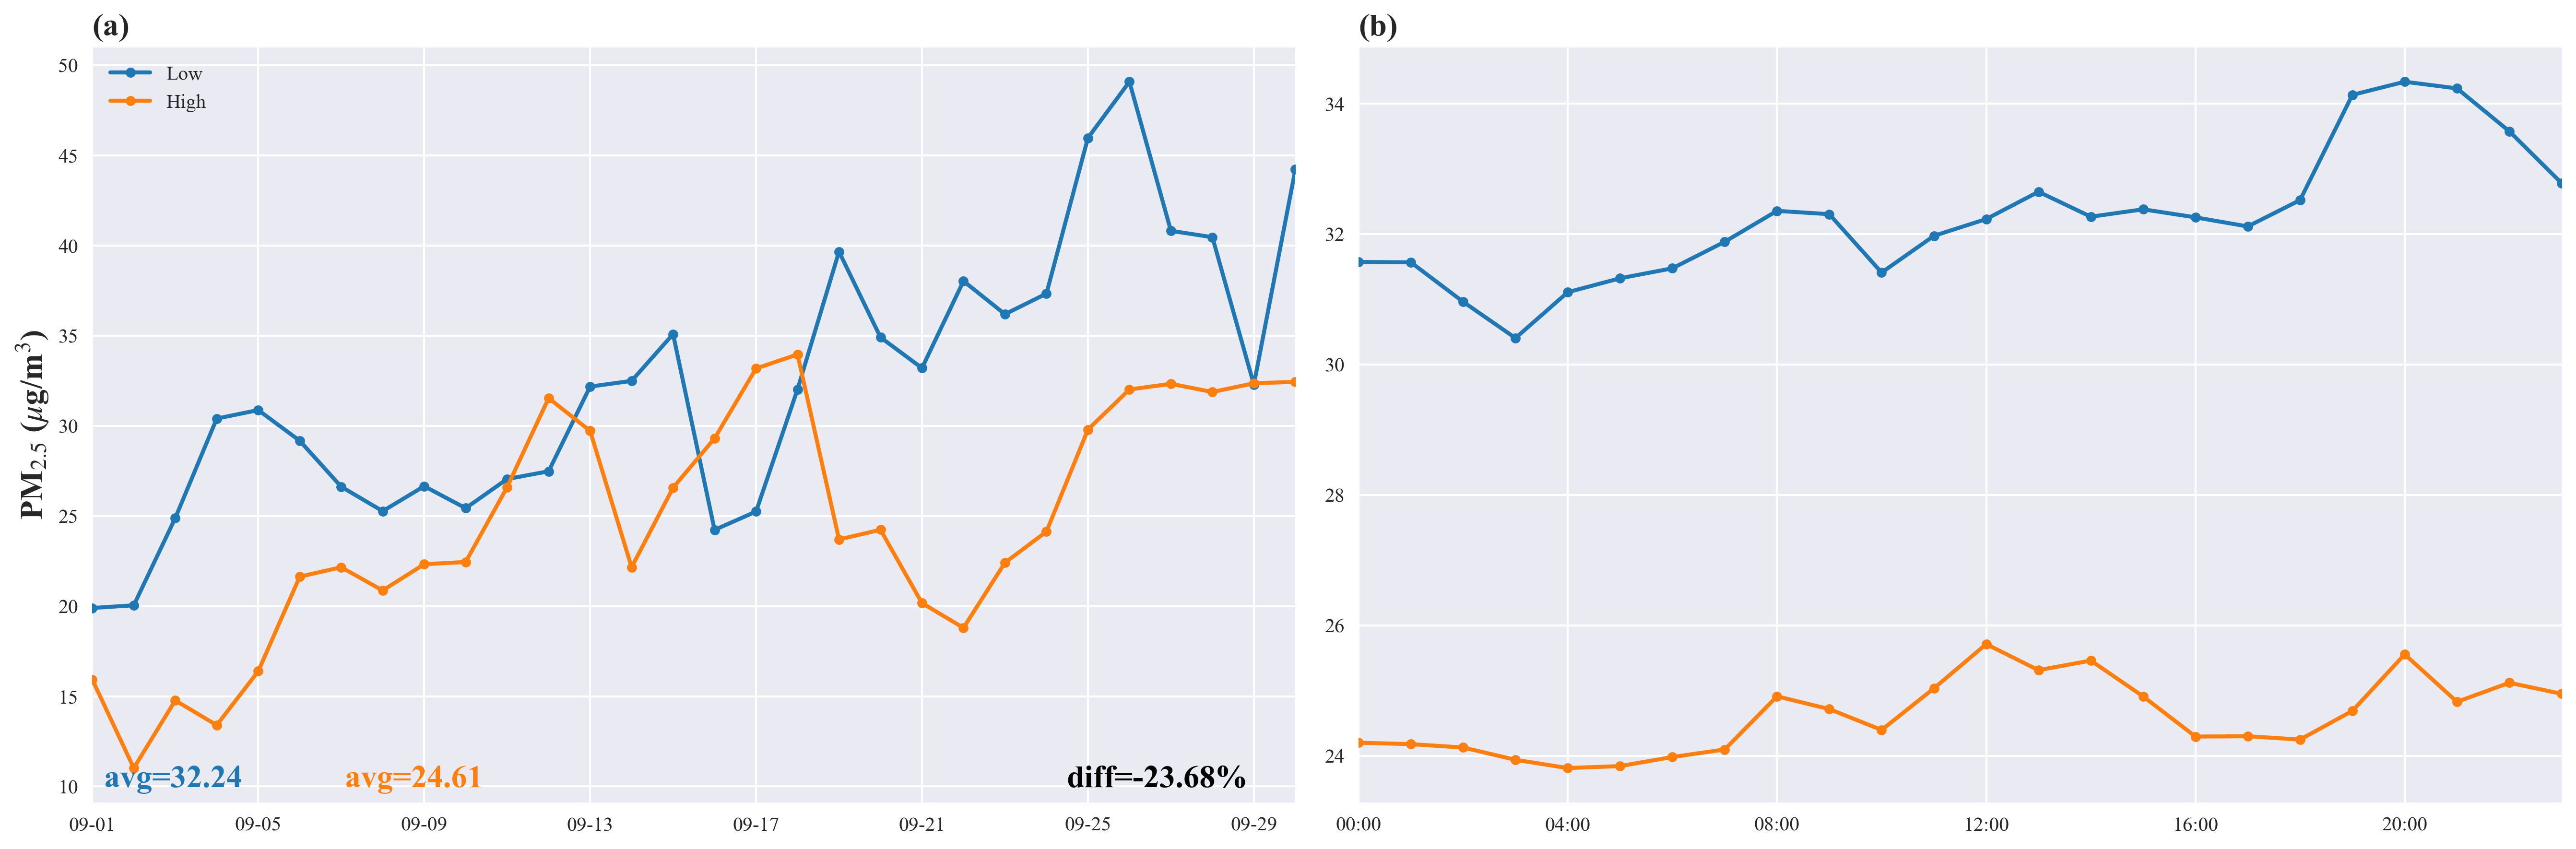

In [4]:
fig = plt.figure(figsize=(18,6),dpi=300)
ax = fig.subplots(1,2)

xx1 = np.arange(0,len(df_day.index),1)
# lower years
ax[0].plot(xx1,df_day['Low'],color='tab:blue',linewidth=2,label='Low',marker='.',markersize=10)
# ax[0].fill_between(xx1,df_80per['Low'],df_20per['Low'],color='tab:blue',alpha=0.1)
# higher years
ax[0].plot(xx1,df_day['High'],color='tab:orange',linewidth=2,label='High',marker='.',markersize=10)
# ax[0].fill_between(xx1,df_80per['High'],df_20per['High'],color='tab:orange',alpha=0.1)

# ticks and labels
ax[0].set_xlim([0,len(df_day.index)-1])
# ax[0].set_ylim(20,190)
ax[0].set_xticks(xx1[::4])
ax[0].set_xticklabels(pd.date_range('2023-09-01','2023-09-30',freq='4D').strftime('%m-%d'))#,rotation=45)
ax[0].legend(loc=2)

xx2 = np.arange(0,len(df_daily.index),1)
# lower years
ax[1].plot(xx2,df_daily['Low'],color='tab:blue',linewidth=2,label='Low',marker='.',markersize=10)
# higher years
ax[1].plot(xx2,df_daily['High'],color='tab:orange',linewidth=2,label='High',marker='.',markersize=10)

# ticks and labels
ax[1].set_xlim([0,len(df_daily.index)-1])
# ax[1].set_ylim(20,190)
ax[1].set_xticks(xx2[::4])
ax[1].set_xticklabels(pd.date_range('2023-09-01T00','2023-09-01T23',freq='4H').strftime('%H:%M'))#,rotation=45)

# ==================================================
# add text
strdict = {'fontsize': 16, 'fontweight': 'bold'}
low_str = '{:.2f}'.format(df_day['Low'].mean())
high_str = '{:.2f}'.format(df_day['High'].mean())

ax[0].text(0.01,0.02,f'avg={low_str}',color='tab:blue',transform=ax[0].transAxes,fontdict=strdict)
ax[0].text(0.21,0.02,f'avg={high_str}',color='tab:orange',transform=ax[0].transAxes,fontdict=strdict)

diff_str = '{:.2f}'.format((df_day['High'].mean() - df_day['Low'].mean()) / df_day['Low'].mean() *100)
if float(diff_str)>0:
    ax[0].text(x=0.81, y=0.02, s=f'diff=+{diff_str}%', color='k', fontdict=strdict, transform=ax[0].transAxes)
else:
    ax[0].text(x=0.81, y=0.02, s=f'diff={diff_str}%', color='k', fontdict=strdict, transform=ax[0].transAxes)
    
ax[0].set_title('(a)',loc='left',fontdict=strdict)
ax[1].set_title('(b)',loc='left',fontdict=strdict)
ax[0].set_ylabel('PM$_{2.5}$ ($\mu$g/m$^3$)',fontdict=strdict)
plt.tight_layout()
plt.show()